In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [26]:
redwine_data = pd.read_csv("winequality-red.csv")

# 相關係數表

In [27]:
cor = redwine_data.corr()
cor.style.apply(lambda x: ["background-color: #ff33aa" 
                          if abs(v) > 0.6 and v%12 != v//12+1 else "" for i, v in enumerate(x)], axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.256131,0.671703,0.114777,0.0937052,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.0616683,0.124052
volatile acidity,-0.256131,1,-0.552496,0.00191788,0.0612978,-0.0105038,0.07647,0.0220262,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1,0.143577,0.203823,-0.0609781,0.035533,0.364947,-0.541904,0.31277,0.109903,0.226373
residual sugar,0.114777,0.00191788,0.143577,1,0.0556095,0.187049,0.203028,0.355283,-0.0856524,0.00552712,0.0420754,0.0137316
chlorides,0.0937052,0.0612978,0.203823,0.0556095,1,0.00556215,0.0474005,0.200632,-0.265026,0.37126,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.0105038,-0.0609781,0.187049,0.00556215,1,0.667666,-0.0219458,0.0703775,0.0516576,-0.0694084,-0.0506561
total sulfur dioxide,-0.113181,0.07647,0.035533,0.203028,0.0474005,0.667666,1,0.0712695,-0.0664946,0.0429468,-0.205654,-0.1851
density,0.668047,0.0220262,0.364947,0.355283,0.200632,-0.0219458,0.0712695,1,-0.341699,0.148506,-0.49618,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.0856524,-0.265026,0.0703775,-0.0664946,-0.341699,1,-0.196648,0.205633,-0.0577314
sulphates,0.183006,-0.260987,0.31277,0.00552712,0.37126,0.0516576,0.0429468,0.148506,-0.196648,1,0.0935948,0.251397


## 針對高相關係數的作圖

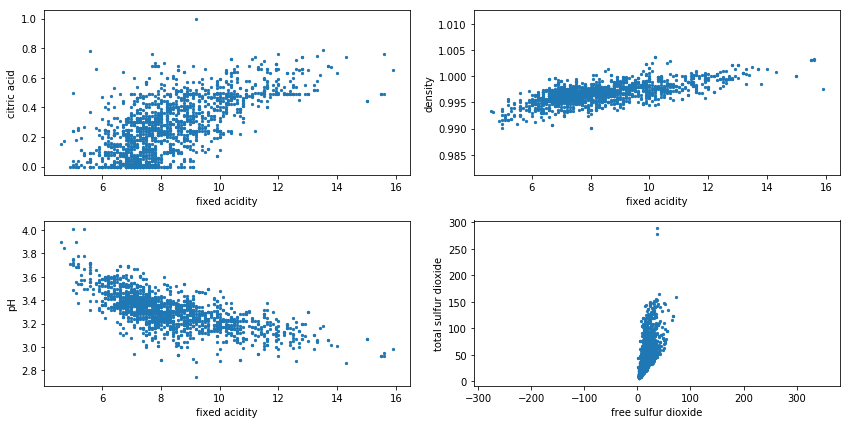

In [28]:
fig = plt.figure(figsize=(12, 6))

keys = np.array(redwine_data.keys())
plt.subplot(221)
plt.scatter(redwine_data[keys[0]], redwine_data[keys[2]], s=5)
plt.xlabel(keys[0])
plt.ylabel(keys[2])
# plt.axis([5,17,-0.5,1])

plt.subplot(222)
plt.scatter(redwine_data[keys[0]], redwine_data[keys[7]], s=5)
plt.xlabel(keys[0])
plt.ylabel(keys[7])

plt.subplot(223)
plt.scatter(redwine_data[keys[0]], redwine_data[keys[8]], s=5)
plt.xlabel(keys[0])
plt.ylabel(keys[8])

plt.subplot(224)
plt.scatter(redwine_data[keys[5]], redwine_data[keys[6]], s=5)
plt.xlabel(keys[5])
plt.ylabel(keys[6])
plt.axis('equal')

plt.tight_layout()

# 各資料分佈

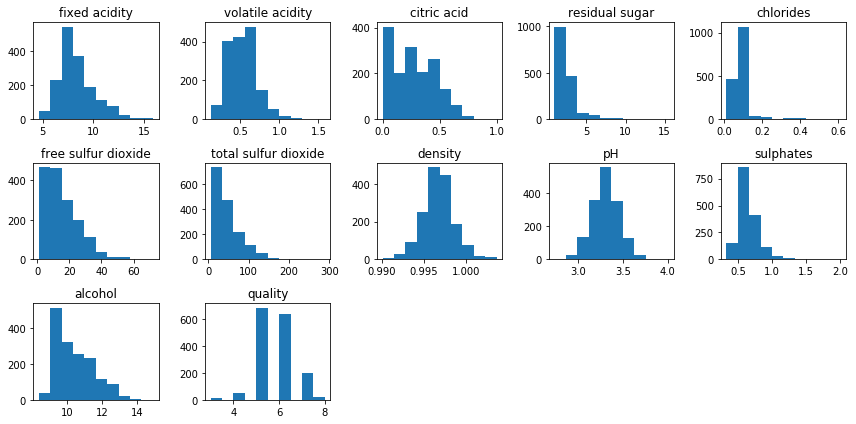

In [29]:
plt.figure(figsize=(12, 6))
for i, key  in enumerate(redwine_data):
    plt.subplot(3,5,i+1)
    plt.hist(redwine_data[key])
    plt.title(key)
    
plt.tight_layout()

# 移除掉高相關特徵，並合併兩個 sulfur dioxide 欄位

Text(0.5,1,'free and total sulfur dioxide aggregated')

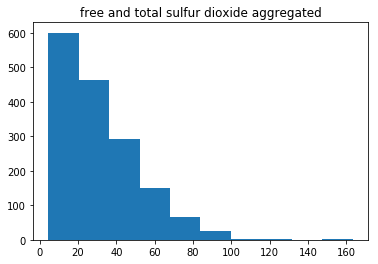

In [30]:
data5 = np.array(redwine_data[keys[5]])
data6 = np.array(redwine_data[keys[6]])
aggregated_sulfur = (data5+data6)/2
plt.hist(aggregated_sulfur)
plt.title('free and total sulfur dioxide aggregated')

In [102]:
exclude = ['pH', 'density', 'free sulfur dioxide', 'total sulfur dioxide'] 
filtered_data = redwine_data.drop(labels=exclude, axis=1)
filtered_data['aggregated sulfur'] = pd.Series(aggregated_sulfur)
keys = list(filtered_data.keys())
keys[-2], keys[-1] = keys[-1], keys[-2]
selected_data = filtered_data[keys]

# 歸一化分佈

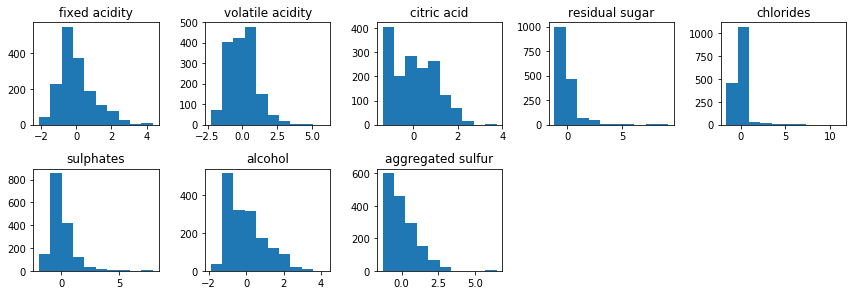

In [32]:
attributes = selected_data.drop('quality', axis=1)
z_score = (attributes - attributes.mean() ) / attributes.std()

plt.figure(figsize=(12, 6))
for i, key  in enumerate(attributes):
    plt.subplot(3,5,i+1)
    plt.hist(z_score[key])
    plt.title(key)
    
plt.tight_layout()
# z_score[abs(z_score) > 3]

# 移除 outliners

In [33]:
out_liners = np.array(abs(z_score) > 3)
out_liners_idx = np.unique(np.where(out_liners)[0])
del filtered_data
filtered_data = selected_data.drop(index=out_liners_idx)
filtered_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,sulphates,alcohol,aggregated sulfur,quality
0,7.4,0.700,0.00,1.9,0.076,0.56,9.4,22.5,5
1,7.8,0.880,0.00,2.6,0.098,0.68,9.8,46.0,5
2,7.8,0.760,0.04,2.3,0.092,0.65,9.8,34.5,5
3,11.2,0.280,0.56,1.9,0.075,0.58,9.8,38.5,6
4,7.4,0.700,0.00,1.9,0.076,0.56,9.4,22.5,5
5,7.4,0.660,0.00,1.8,0.075,0.56,9.4,26.5,5
6,7.9,0.600,0.06,1.6,0.069,0.46,9.4,37.0,5
7,7.3,0.650,0.00,1.2,0.065,0.47,10.0,18.0,7
8,7.8,0.580,0.02,2.0,0.073,0.57,9.5,13.5,7
9,7.5,0.500,0.36,6.1,0.071,0.80,10.5,59.5,5


# select train and eval data

In [158]:
eval_size = 320
eval_select_idx = np.random.randint(0, len(redwine_data),[eval_size])
exclude = np.unique(np.concatenate([eval_select_idx, out_liners_idx]))

len(exclude)

389

In [162]:
all = np.arange(0, len(redwine_data), 1)
train_select_idx = np.delete(all, exclude)
len(train_select_idx)

1210

In [166]:
z_score_and_label = z_score
z_score_and_label['quality'] = redwine_data['quality']

train_set = z_score_and_label.iloc[train_select_idx]
eval_set = z_score_and_label.iloc[eval_select_idx]
train_set.to_csv('winequality-red-preprocessed-train.csv')
eval_set.to_csv('winequality-red-preprocessed-eval.csv')